## Advanced Lane Finding Project

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

---
## 1. Camera calibration using chessboard images and undistored images

In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
%matplotlib inline

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2) # shape into two columns

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('../camera_cal/calibration*.jpg')

# Step through the list and search for chessboard corners
for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6),None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (9,6), corners, ret)
        cv2.imshow('img',img)
        cv2.waitKey(500)

cv2.destroyAllWindows()

In [2]:
# Only calibrate the camera once
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

In [3]:
import pickle 
coeff = {}
coeff['mtx'] = mtx
coeff['dist'] = dist
with open('camera_coeff', 'wb' ) as f:
    pickle.dump(coeff, f)

In [4]:
for fname in images:
    img = cv2.imread(fname)
    dst = cv2.undistort(img, mtx, dist, None, mtx)
    cv2.imshow('undistort', dst)
    cv2.waitKey(500)
cv2.destroyAllWindows()

#TODO: Subplot for the orginal/ undistorted image

## 2. Read raw image from test_images

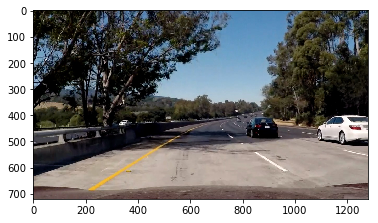

In [5]:
raw_image = cv2.imread('../test_images/test5.jpg')  #BGR
plt.imshow(cv2.cvtColor(raw_image, cv2.COLOR_BGR2RGB)) #plt show in RGB

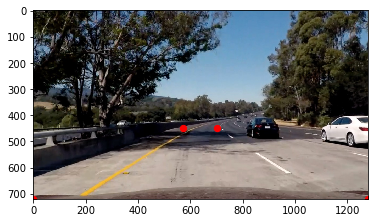

In [6]:
# Undistort

undistort  = cv2.undistort(raw_image, mtx, dist, None, mtx)
plt.scatter(x=[572, 0,1280, 702], y=[450, 720, 720, 450], c='r', s=40) # experiement the dots
plt.imshow(cv2.cvtColor(undistort, cv2.COLOR_BGR2RGB))

## 3. Perspective transform

In [14]:
height, width = (undistort.shape[1], undistort.shape[0])
src = np.float32([[572, 450], [0, 720], [1280, 720],[702, 450]])
dst = np.float32([[160, 0], [160, 720], [1120, 720], [1000, 0]])
M = cv2.getPerspectiveTransform(src, dst)

warped = cv2.warpPerspective(undistort, M, (height, width))

In [15]:
undistort.shape[0]

720

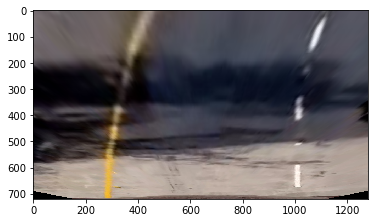

In [16]:
plt.imshow(cv2.cvtColor(warped, cv2.COLOR_BGR2RGB))

## 4. Color space HLS and filter threshold

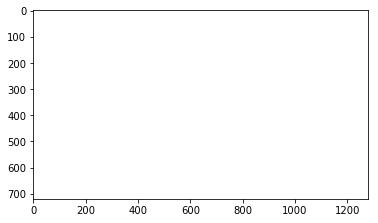

In [10]:
hls = cv2.cvtColor(warped, cv2.COLOR_BGR2HLS)
S = hls[:,:,2]
binary_output = np.zeros_like(S)
binary_output[(S > 90) & (S< 255)] = 1
plt.imshow(binary_output, cmap='binary')